In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_= np.linspace(0, 100, 101)



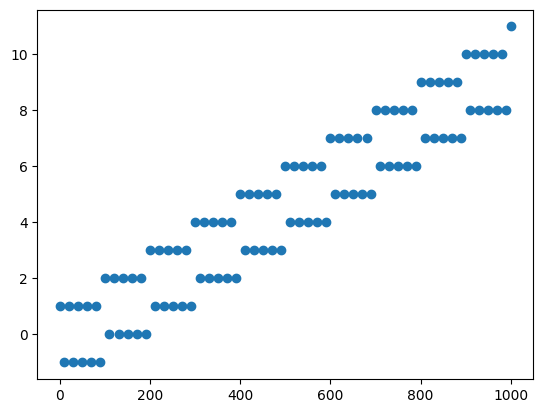

In [3]:
t_ = 10*x_
u_ = np.cos(np.pi*x_) + x_//10
# u_ = np.cos(x_)

plt.figure()
plt.scatter(t_, u_)
plt.show()

In [39]:
def wikipedia_exp_smoothing(x:np.array, tau:float, t=np.array) -> np.array:
    s = np.zeros(x.shape)
    prev = s[0] = x[0]
    for i in range(x.shape[0]):
        if i>0:
            decay = np.exp(-(t[i]-t[i-1])/tau)
            s[i] = (1-decay) * x[i] + decay * prev
            prev = s[i]
    return s

def custom_exp_smoothing(x:np.array, tau:float, t=np.array) -> np.array:
    assert len(x.shape)==1, "EMA only works on 1D array."
    s = np.zeros(x.shape)
    z = np.zeros(x.shape) 
    s_prev = s[0] = x[0]
    z_prev = z[0]=1
    for i in range(x.shape[0]):
        if i>0:
            decay = np.exp(-(t[i]-t[i-1])/tau)
            z[i] = 1 + decay * z_prev
            s[i] = (x[i] + decay * z_prev * s_prev) / z[i]
            z_prev = z[i]
            s_prev = s[i]
    return s
    
    

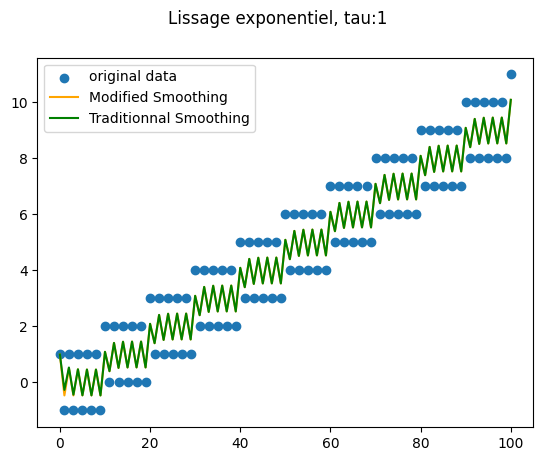

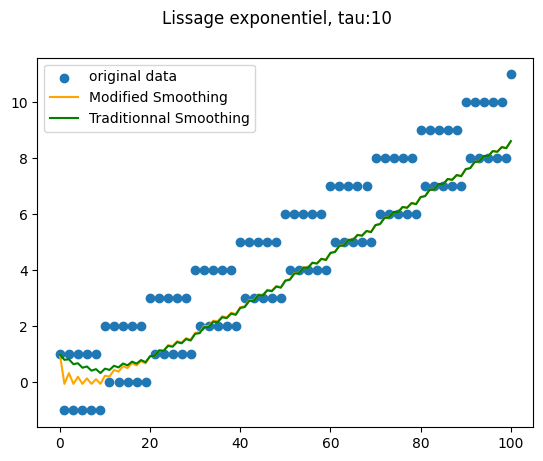

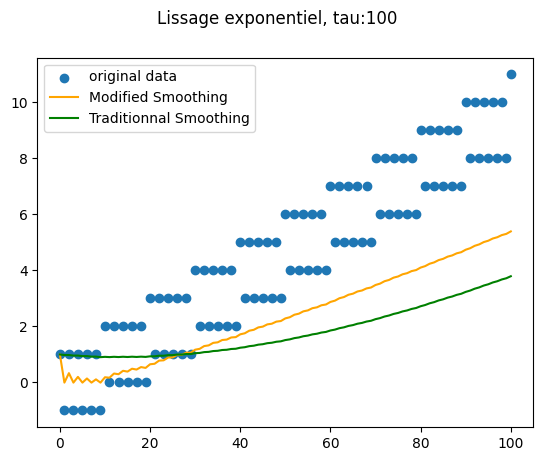

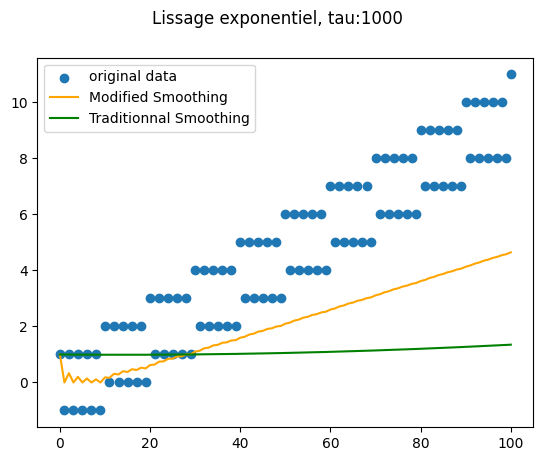

In [40]:
y_ = 1 * np.ones(x_.shape)
t_ = 1*x_
u_ = np.cos(np.pi*x_) + x_//10
for param in [1, 10, 100, 1000]:
    plt.figure()
    plt.suptitle(f"Lissage exponentiel, tau:{int(param)}")
    plt.scatter(t_, u_, label='original data')
    plt.plot(t_, custom_exp_smoothing(x=u_, t=t_, tau=param), c="orange", label="Modified Smoothing")
    plt.plot(t_, wikipedia_exp_smoothing(x=u_, t=t_, tau=param), c="green", label="Traditionnal Smoothing")
    plt.legend()
    plt.savefig(f'img/plot_{int(param)}_slow.png')
    plt.show()


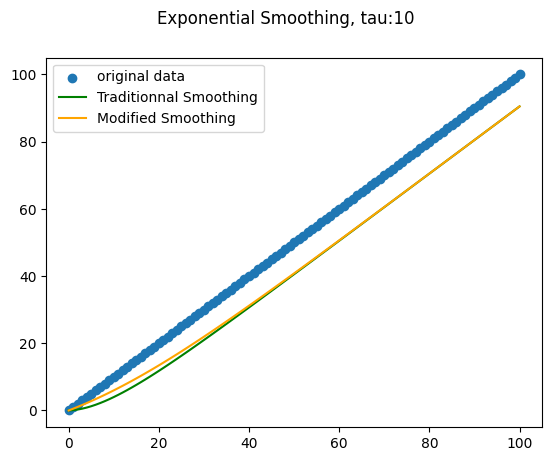

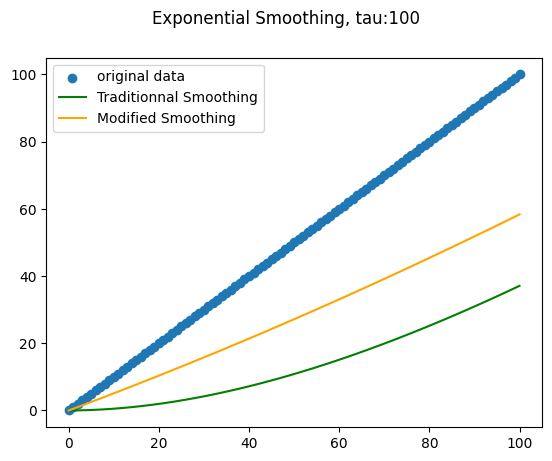

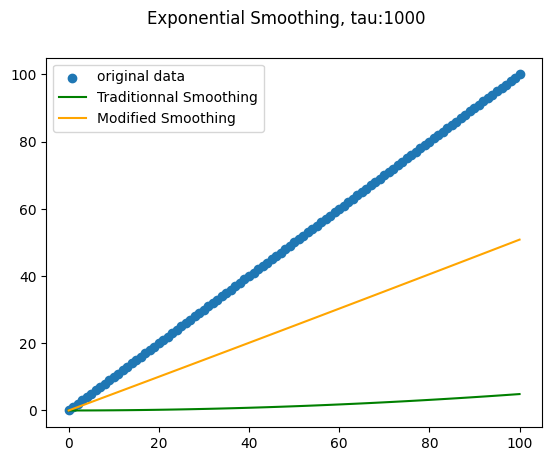

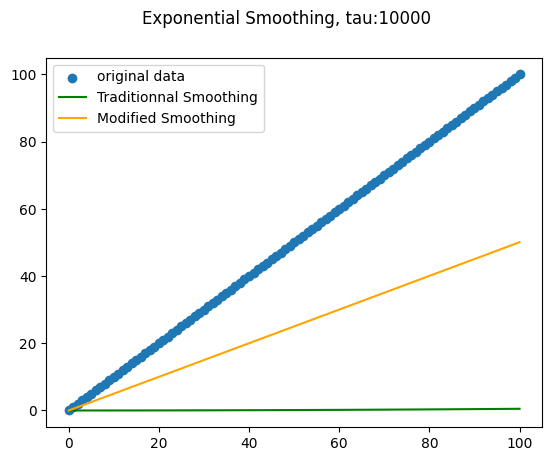

In [41]:
y_ = 1 * np.ones(x_.shape)
t_ = x_
u_ = x_
for param in [10, 100, 1000, 1e4]:
    plt.figure()
    plt.suptitle(f"Exponential Smoothing, tau:{int(param)}")
    plt.scatter(t_, u_, label='original data')
    plt.plot(t_, wikipedia_exp_smoothing(x=u_, t=t_, tau=param), c="green", label="Traditionnal Smoothing")
    plt.plot(t_, custom_exp_smoothing(x=u_, t=t_, tau=param), c="orange", label='Modified Smoothing')
    plt.legend()
    plt.savefig(f'img/plot_{int(param)}_fast.png')
    
    plt.show()


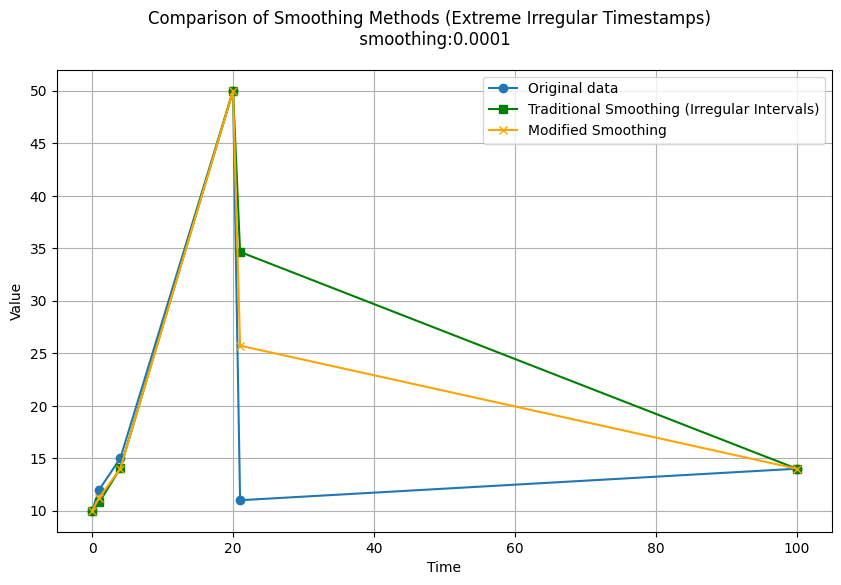

In [42]:
t_ = np.array([0, 1, 4, 20, 21, 100])
u_ = np.array([10, 12, 15, 50, 11, 14])
tau = 2

plt.figure(figsize=(10, 6))
plt.suptitle(f"Comparison of Smoothing Methods (Extreme Irregular Timestamps) \n smoothing:{1/(param)}")
plt.plot(t_, u_, 'o-', label='Original data')
plt.plot(t_, wikipedia_exp_smoothing(x=u_, t=t_, tau=tau), 's-', c="green", label='Traditional Smoothing (Irregular Intervals)')
plt.plot(t_, custom_exp_smoothing(x=u_, t=t_, tau=tau), 'x-', c="orange", label='Modified Smoothing')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig(f'img/plot_{int(param)}_fast.png')
plt.show()

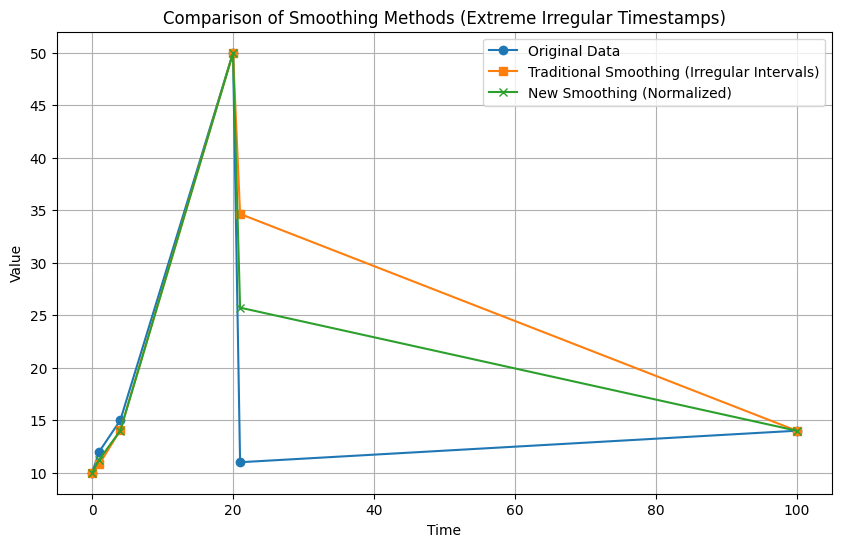

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def traditional_exp_smoothing(timestamps, data, tau):
    smoothed = [data[0]]
    for i in range(1, len(data)):
        delta_t = timestamps[i] - timestamps[i-1]
        alpha = 1 - np.exp(-delta_t / tau)
        S = alpha * data[i] + (1 - alpha) * smoothed[-1]
        smoothed.append(S)
    return np.array(smoothed)

def new_exp_smoothing(timestamps, data, tau):
    Z = [1]
    EMA = [data[0]]
    for i in range(1, len(data)):
        delta_t = timestamps[i] - timestamps[i-1]
        Z_t = 1 + np.exp(-delta_t / tau) * Z[-1]
        EMA_t = (data[i] + np.exp(-delta_t / tau) * Z[-1] * EMA[-1]) / Z_t
        Z.append(Z_t)
        EMA.append(EMA_t)
    return np.array(EMA)

timestamps_extreme = np.array([0, 1, 4, 20, 21, 100])
data_extreme = np.array([10, 12, 15, 50, 11, 14])
tau = 2

traditional_smoothed_extreme = traditional_exp_smoothing(timestamps_extreme, data_extreme, tau)
new_smoothed_extreme = new_exp_smoothing(timestamps_extreme, data_extreme, tau)

plt.figure(figsize=(10, 6))
plt.plot(timestamps_extreme, data_extreme, 'o-', label='Original Data')
plt.plot(timestamps_extreme, traditional_smoothed_extreme, 's-', label='Traditional Smoothing (Irregular Intervals)')
plt.plot(timestamps_extreme, new_smoothed_extreme, 'x-', label='New Smoothing (Normalized)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Smoothing Methods (Extreme Irregular Timestamps)')
plt.legend()
plt.grid(True)
plt.show()